# A Walk Through Linear Models
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement a whole bunch of **linear classifiers**
- compare their performance and properties

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked. 

In [2]:
# some basic imports
import numpy as np
import scipy
import matplotlib.pyplot as plt
from mkdata import mkdata
from plotdata import plotdata

%matplotlib inline

%load_ext autoreload
%autoreload 2

You can use this skeleton or write your own.

NOTE: Be becareful that the bias term is in the first element of weight, that is `y = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X)))).T`

### Part1: Preceptron

E_train is 0.0, E_test is 0.0130482
Average number of iterations is 28.6.


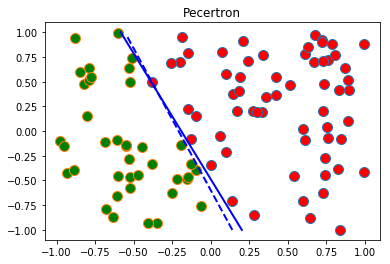

In [217]:
from perceptron import perceptron

nRep = 1000 # number of replicates
nTrain = 100 # number of training data
nTest = 10000
totalIter = 0
E_train = 0
E_test = 0
for j in range(nRep):
    XH, yH, w_f = mkdata(nTrain+nTest)
    X = np.array(XH[:, 0:nTrain])
    X_t = XH[:, nTrain:nTrain+nTest+1]
    y = yH[:, 0:nTrain]
    y_t = yH[:,nTrain:nTrain+nTest+1]
    P, N = X.shape
    PT, NT = X_t.shape
    b = np.ones((1, N))
    x = np.vstack((b, X))
    l = y[0]
    w_g, iters = perceptron(X, y)
    for i in range(N):
        a = np.array([x[:, i]])
        f = np.matmul(w_g.T, a.T)
        g = np.dot(f, l[i])
        if g <= 0:
            E_train = E_train + 1
    b = np.ones((1, nTest))
    x_t = np.vstack((b, X_t))
    l = y_t[0]
    for i in range(NT):
        a = np.array([x_t[:, i]])
        f = np.matmul(w_g.T, a.T)
        g = np.dot(f, l[i])
        if g <= 0:
            E_test = E_test + 1
    
    
    totalIter += iters
avgIter = totalIter/nRep
E_train = E_train/nRep/nTrain
E_test = E_test/nRep/nTest

print('E_train is {}, E_test is {}'.format(E_train, E_test))
print('Average number of iterations is {}.'.format(avgIter))
plotdata(X, y, w_f, w_g, 'Pecertron')

### Part2: Preceptron: Non-linearly separable case

E_train is 0.32, E_test is 0.2636
Average number of iterations is 10001.0.


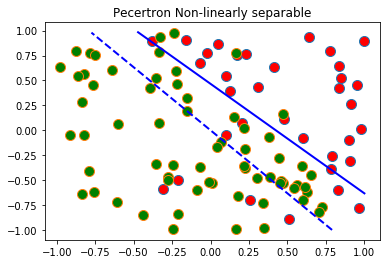

In [218]:
from perceptron import perceptron

nRep = 1 # number of replicates
nTrain = 100 # number of training data
nTest = 10000
totalIter = 0
E_train = 0
E_test = 0
for j in range(nRep):
    XH, yH, w_f = mkdata(nTrain+nTest, 'noisy')
    X = np.array(XH[:, 0:nTrain])
    X_t = XH[:, nTrain:nTrain+nTest+1]
    y = yH[:, 0:nTrain]
    y_t = yH[:,nTrain:nTrain+nTest+1]
    P, N = X.shape
    PT, NT = X_t.shape
    b = np.ones((1, N))
    x = np.vstack((b, X))
    l = y[0]
    w_g, iters = perceptron(X, y)
    for i in range(N):
        a = np.array([x[:, i]])
        f = np.matmul(w_g.T, a.T)
        g = np.dot(f, l[i])
        if g <= 0:
            E_train = E_train + 1
    b = np.ones((1, nTest))
    x_t = np.vstack((b, X_t))
    l = y_t[0]
    for i in range(NT):
        a = np.array([x_t[:, i]])
        f = np.matmul(w_g.T, a.T)
        g = np.dot(f, l[i])
        if g <= 0:
            E_test = E_test + 1
    
    
    totalIter += iters
avgIter = totalIter/nRep
E_train = E_train/nRep/nTrain
E_test = E_test/nRep/nTest
print('E_train is {}, E_test is {}'.format(E_train, E_test))
print('Average number of iterations is {}.'.format(avgIter))
plotdata(X, y, w_f, w_g, 'Pecertron Non-linearly separable')


### Part3: Linear Regression

E_train is 0.04013, E_test is 0.0486292


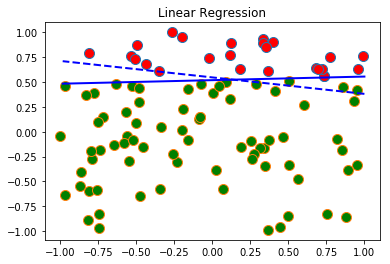

In [73]:
from linear_regression import linear_regression

nRep = 1000 # number of replicates
nTrain = 100 # number of training data
nTest = 10000
E_train = 0
E_test = 0
for j in range(nRep):
    XH, yH, w_f = mkdata(nTrain+nTest)
    X = np.array(XH[:, 0:nTrain])
    X_t = XH[:, nTrain:nTrain+nTest+1]
    y = yH[:, 0:nTrain]
    y_t = yH[:,nTrain:nTrain+nTest+1]
    P, N = X.shape
    PT, NT = X_t.shape
    b = np.ones((1, N))
    x = np.vstack((b, X))
    l = y[0]
    w_g1 = linear_regression(X, y)
    for i in range(N):
        a = np.array([x[:, i]])
        f = np.dot(w_g1.T, a.T)
        g = np.dot(f, l[i])
        if g <= 0:
            E_train = E_train + 1
    b = np.ones((1, NT))
    x = np.vstack((b, X_t))
    l = y_t[0]
    for i in range(NT):
        a = np.array([x[:, i]])
        f = np.dot(w_g1.T, a.T)
        g = np.dot(f, l[i])
        if g <= 0:
            E_test = E_test + 1
E_train = E_train/nRep/nTrain
E_test = E_test/nRep/nTest

print('E_train is {}, E_test is {}'.format(E_train, E_test))
rwg = np.array(w_g1)
plotdata(X, y, w_f, rwg, 'Linear Regression');


## Part4: Linear Regression: noisy

E_train is 0.13296, E_test is 0.14443910000000001


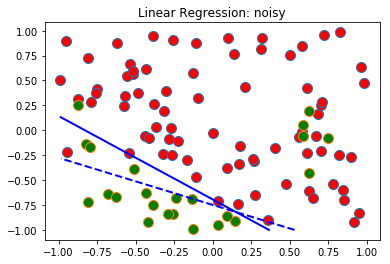

In [74]:
from linear_regression import linear_regression

nRep = 1000 # number of replicates
nTrain = 100 # number of training data
nTest = 10000
E_train = 0
E_test = 0
for j in range(nRep):
    XH, yH, w_f = mkdata(nTrain+nTest, 'noisy')
    X = np.array(XH[:, 0:nTrain])
    X_t = XH[:, nTrain:nTrain+nTest+1]
    y = yH[:, 0:nTrain]
    y_t = yH[:,nTrain:nTrain+nTest+1]
    P, N = X.shape
    PT, NT = X_t.shape
    b = np.ones((1, N))
    x = np.vstack((b, X))
    l = y[0]
    w_g1 = linear_regression(X, y)
    for i in range(N):
        a = np.array([x[:, i]])
        f = np.dot(w_g1.T, a.T)
        g = np.dot(f, l[i])
        if g <= 0:
            E_train = E_train + 1
    b = np.ones((1, NT))
    x = np.vstack((b, X_t))
    l = y_t[0]
    for i in range(NT):
        a = np.array([x[:, i]])
        f = np.dot(w_g1.T, a.T)
        g = np.dot(f, l[i])
        if g <= 0:
            E_test = E_test + 1
E_train = E_train/nRep/nTrain
E_test = E_test/nRep/nTest

print('E_train is {}, E_test is {}'.format(E_train, E_test))
rwg = np.array(w_g1)
plotdata(X, y, w_f, rwg, 'Linear Regression: noisy');

## Part5: Linear Regression: poly_fit

In [235]:
import scipy.io as sio
poly_train = sio.loadmat('poly_train')
X, y = poly_train['X'], poly_train['y']
poly_test = sio.loadmat('poly_test')
X_test, y_test = poly_test['X_test'], poly_test['y_test']
w = linear_regression(X, y)
# Compute training, testing error
E_train = 0
E_test = 0
nRep = 1
for j in range(nRep):
    P, N = X.shape
    PT, NT = X_test.shape
    b = np.ones((1, N))
    x = np.vstack((b, X))
    l = y[0]
    for i in range(N):
        a = np.array([x[:, i]])
        f = np.dot(w.T, a.T)
        g = np.dot(f, l[i])
        if g <= 0:
            E_train = E_train + 1
    b = np.ones((1, NT))
    xt = np.vstack((b, X_test))
    l = y_test[0]
    for i in range(NT):
        a = np.array([xt[:, i]])
        f = np.dot(w.T, a.T)
        g = np.dot(f, l[i])
        if g <= 0:
            E_test = E_test + 1
E_train = E_train/nRep/N
E_test = E_test/nRep/NT

print('E_train is {}, E_test is {}'.format(E_train, E_test))

# poly_fit with transform
x1 = X[0]
x2 = X[1]
x1x2 = x1 * x2
x1x1 = x1 * x1
x2x2 = x2 * x2
X_t = np.vstack((X, np.vstack((x1x2, np.vstack((x1x1, x2x2))))))
w_x = linear_regression(X_t, y)

x1t = X_test[0]
x2t = X_test[1]
x1x2t = x1t * x2t
x1x1t = x1t * x1t
x2x2t = x2t * x2t
X_test_t = np.vstack((X_test, np.vstack((x1x2t, np.vstack((x1x1t, x2x2t))))))

E_train = 0
E_test = 0
nRep = 1
for j in range(nRep):
    P, N = X_t.shape
    PT, NT = X_test_t.shape 
    b = np.ones((1, N))
    x_t_x = np.vstack((b, X_t))
    l = y[0]
    for i in range(N):
        a = np.array([x_t_x[:, i]])
        f = np.dot(w_x.T, a.T)
        g = np.dot(f, l[i])
        if g <= 0:
            E_train = E_train + 1
    b = np.ones((1, NT))
    xt_t_x = np.vstack((b, X_test_t))
    l = y_test[0]
    for i in range(NT):
        a = np.array([xt_t_x[:, i]])
        f = np.dot(w_x.T, a.T)
        g = np.dot(f, l[i])
        if g <= 0:
            E_test = E_test + 1
E_train = E_train/nRep/N
E_test = E_test/nRep/NT



# Compute training, testing error
print('E_train is {}, E_test is {}'.format(E_train, E_test))

E_train is 0.49, E_test is 0.5496
E_train is 0.05, E_test is 0.066


## Part6: Logistic Regression

E_train is 0.0023, E_test is 0.011887


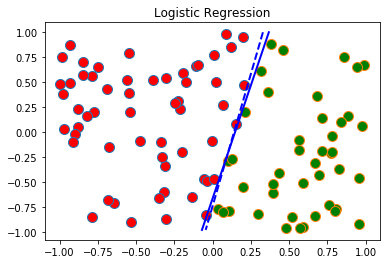

In [240]:
from logistic import logistic

# Since logistic regression outputs 0/1, we should adjust the label y.

nRep = 100 # number of replicates
nTrain = 100 # number of training data
nTest = 10000
E_train = 0
E_test = 0
for j in range(nRep):
    XH, yH, w_f = mkdata(nTrain+nTest)
    X = np.array(XH[:, 0:nTrain])
    X_t = XH[:, nTrain:nTrain+nTest+1]
    y = yH[:, 0:nTrain]
    y_t = yH[:,nTrain:nTrain+nTest+1]
    P, N = X.shape
    PT, NT = X_t.shape
    b = np.ones((1, N))
    x = np.vstack((b, X))
    l = y[0]
    w_g1 = logistic(x, y)
    for i in range(N):
        a = np.array([x[:, i]])
        f = np.dot(w_g1.T, a.T)
        g = np.dot(f, l[i])
        if g <= 0:
            E_train = E_train + 1
    b = np.ones((1, NT))
    x = np.vstack((b, X_t))
    l = y_t[0]
    for i in range(NT):
        a = np.array([x[:, i]])
        f = np.dot(w_g1.T, a.T)
        g = np.dot(f, l[i])
        if g <= 0:
            E_test = E_test + 1
E_train = E_train/nRep/nTrain
E_test = E_test/nRep/nTest

print('E_train is {}, E_test is {}'.format(E_train, E_test))
rwg = np.array(w_g1)
plotdata(X, y, w_f, rwg, 'Logistic Regression')

## Part7: Logistic Regression: noisy

E_train is 0.16, E_test is 0.1351


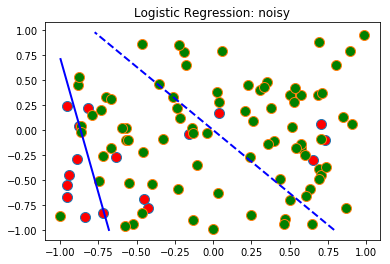

In [242]:

# Since logistic regression outputs 0/1, we should adjust the label y.

# Since logistic regression outputs 0/1, we should adjust the label y.

nRep = 1 # number of replicates
nTrain = 100 # number of training data
nTest = 10000
E_train = 0
E_test = 0
for j in range(nRep):
    XH, yH, w_f = mkdata(nTrain+nTest, 'noisy')
    X = np.array(XH[:, 0:nTrain])
    X_t = XH[:, nTrain:nTrain+nTest+1]
    y = yH[:, 0:nTrain]
    y_t = yH[:,nTrain:nTrain+nTest+1]
    P, N = X.shape
    PT, NT = X_t.shape
    b = np.ones((1, N))
    x = np.vstack((b, X))
    l = y[0]
    w_g1 = logistic(x, y)
    for i in range(N):
        a = np.array([x[:, i]])
        f = np.dot(w_g1.T, a.T)
        g = np.dot(f, l[i])
        if g <= 0:
            E_train = E_train + 1
    b = np.ones((1, NT))
    x = np.vstack((b, X_t))
    l = y_t[0]
    for i in range(NT):
        a = np.array([x[:, i]])
        f = np.dot(w_g1.T, a.T)
        g = np.dot(f, l[i])
        if g <= 0:
            E_test = E_test + 1
E_train = E_train/nRep/nTrain
E_test = E_test/nRep/nTest

print('E_train is {}, E_test is {}'.format(E_train, E_test))
rwg = np.array(w_g1)
plotdata(X, y, w_f, w_g, 'Logistic Regression: noisy')

## Part8: SVM

E_train is 0.0, E_test is 0.0101056
Average number of support vectors is 3.094.


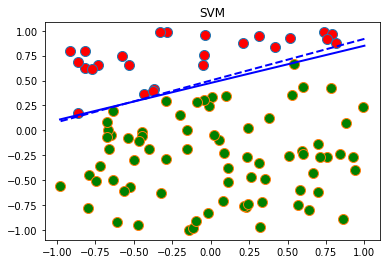

In [71]:
from svm import svm

nRep = 1000; # number of replicates
nTrain = 100; # number of training data
nTest = 10000
E_train = 0
E_test = 0
avgNum = 0
totalNum = 0
for i in range(nRep):
    XH, yH, w_f = mkdata(nTrain+nTest)
    X = np.array(XH[:, 0:nTrain])
    X_t = XH[:, nTrain:nTrain+nTest+1]
    y = yH[:, 0:nTrain]
    y_t = yH[:,nTrain:nTrain+nTest+1]
    P, N = X.shape
    PT, NT = X_t.shape
    b = np.ones((1, N))
    x = np.vstack((b, X))
    w_g, num_sc = svm(x, y)
    l = y[0]
    totalNum = totalNum + num_sc
    # Compute training, testing error
    for i in range(N):
        a = np.array([x[:, i]])
        f = np.dot(w_g.T, a.T)
        g = np.dot(f, l[i])
        if g <= 0:
            E_train = E_train + 1
    b = np.ones((1, NT))
    x = np.vstack((b, X_t))
    l = y_t[0]
    for i in range(NT):
        a = np.array([x[:, i]])
        f = np.dot(w_g.T, a.T)
        g = np.dot(f, l[i])
        if g <= 0:
            E_test = E_test + 1
    # Sum up number of support vectors
avgNum = totalNum / nRep
E_train = E_train / nRep / nTrain
E_test = E_test / nRep / nTest
print('E_train is {}, E_test is {}'.format(E_train, E_test))
print('Average number of support vectors is {}.'.format(avgNum))
plotdata(X, y, w_f, w_g, 'SVM')

You can also try SVM with **noisy** training data. Why it behaves poorly? 
You can also try to implement SVM with **slack variables**.  See how it behaves with noisy training data. However this is left as a bonus part.

E_train is 0.42038, E_test is 0.42361689999999996
Average number of support vectors is 45.151.


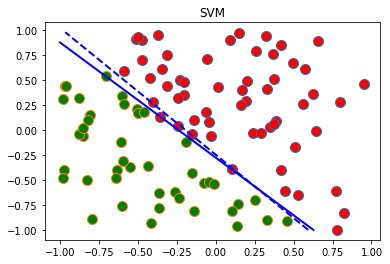

In [65]:
from svm_slack import svm_slack

nRep = 1000; # number of replicates
nTrain = 100; # number of training data
nTest = 10000
E_train = 0
E_test = 0
avgNum = 0
totalNum = 0
for i in range(nRep):
    XH, yH, w_f = mkdata(nTrain+nTest)
    X = np.array(XH[:, 0:nTrain])
    X_t = XH[:, nTrain:nTrain+nTest+1]
    y = yH[:, 0:nTrain]
    y_t = yH[:,nTrain:nTrain+nTest+1]
    P, N = X.shape
    PT, NT = X_t.shape
    b = np.ones((1, N))
    x = np.vstack((b, X))
    sigma = np.ones((N, N))
    x = np.vstack((x, sigma))
    w_g, num_sc = svm_slack(x, y)
    l = y[0]
    totalNum = totalNum + num_sc
    # Compute training, testing error
    for i in range(N):
        a = np.array([x[:, i]])
        f = np.dot(w_g.T, a.T)
        g = np.dot(f, l[i])
        if g <= 0:
            E_train = E_train + 1
    b = np.ones((1, NT))
    x = np.vstack((b, X_t))
    sigma = np.ones((N, NT))
    x = np.vstack((x, sigma))
    l = y_t[0]
    for i in range(NT):
        a = np.array([x[:, i]])
        f = np.dot(w_g.T, a.T)
        g = np.dot(f, l[i])
        if g <= 0:
            E_test = E_test + 1
    # Sum up number of support vectors
avgNum = totalNum / nRep
E_train = E_train / nRep / nTrain
E_test = E_test / nRep / nTest
print('E_train is {}, E_test is {}'.format(E_train, E_test))
print('Average number of support vectors is {}.'.format(avgNum))
plotdata(X, y, w_f, w_g, 'SVM')